<a href="https://colab.research.google.com/github/Brahim-AI/Project_BTC/blob/main/project_btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('bitcoin_data5.csv')
data1 = data.rename(columns={
    'Price':'date',
    'Adj Close': 'Clôture Ajustée',
    'Close': 'Fermeture',
    'High': 'Plus haut',
    'Low': 'Plus bas',
    'Open': 'Ouverture',
    'Volume': 'Volume'})

data1.drop(data.index[0:2], inplace=True)
data1.reset_index(drop=True, inplace=True)

columns_ = ['Clôture Ajustée', 'Fermeture', 'Plus haut', 'Plus bas',
       'Ouverture', 'Volume']

for col in columns_:
    data1[col] = pd.to_numeric(data1[col], errors='coerce')

data2 = data1.copy()
data1= pd.to_datetime(data1['date'])
data2.drop('date', axis=1, inplace=True)
df = pd.concat([data1, data2], axis=1)

df['daily range'] = df['Plus haut'] - df['Plus bas']

FMQ = df['daily range'].mean()

print("Fourchette moyenne quotidienne (High - Low):", FMQ)

# Conversion des prix EUR en MAD
taux_change = 10.8
for col in columns_:
    df[col + ' (MAD)'] = df[col] * taux_change




Fourchette moyenne quotidienne (High - Low): 1238.9720065442602


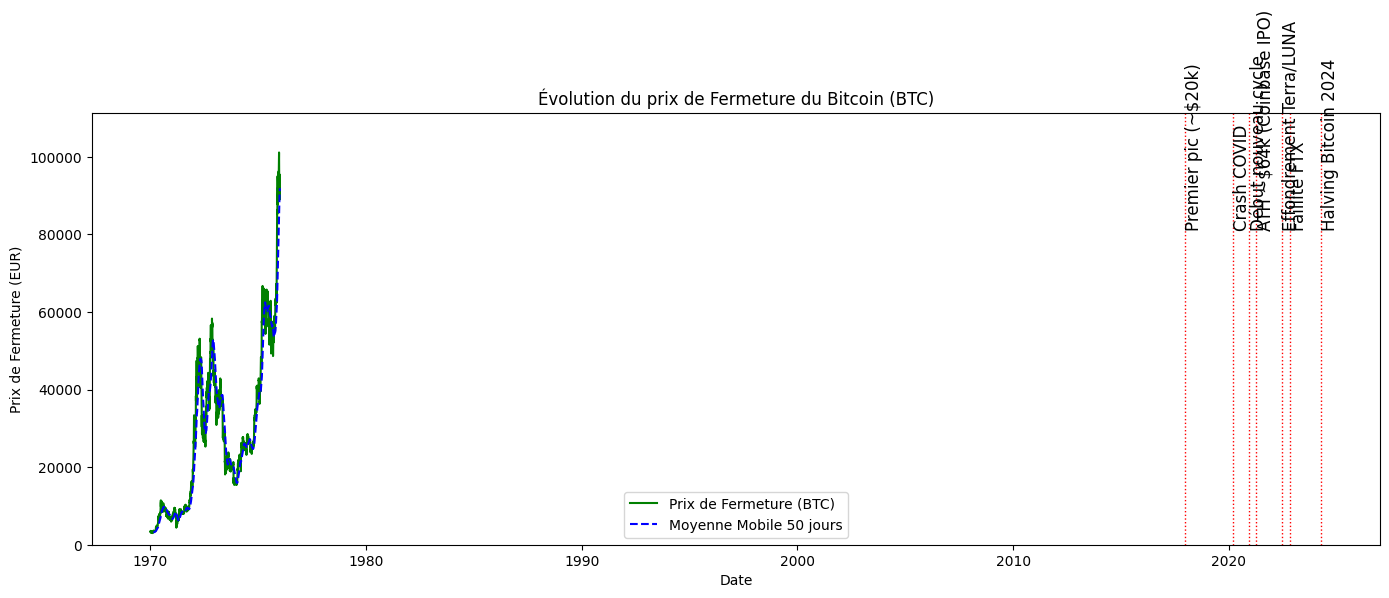

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Tracer le graphique
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Fermeture'], label='Prix de Fermeture (BTC)', color='green')

# Ajouter une moyenne mobile 50 jours
df['MA50'] = df['Fermeture'].rolling(window=50).mean()
plt.plot(df.index, df['MA50'], label='Moyenne Mobile 50 jours', color='blue', linestyle='--')

# Événements marquants (à adapter selon tes dates)
events = {
    '2017-12-17': 'Premier pic (~$20k)',
    '2020-03-12': 'Crash COVID',
    '2020-12-16': 'Début nouveau cycle',
    '2021-04-14': 'ATH ~$64k (Coinbase IPO)',
    '2022-06-18': 'Effondrement Terra/LUNA',
    '2022-11-11': 'Faillite FTX',
    '2024-04-20': 'Halving Bitcoin 2024'
}

for date, label in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle=':', linewidth=1)
    plt.text(pd.to_datetime(date), df['Fermeture'].max()*0.80, label,
             rotation=90, fontsize=12, color='black',
             verticalalignment='bottom', horizontalalignment='left')

# Mise en forme
plt.title("Évolution du prix de Fermeture du Bitcoin (BTC)")
plt.xlabel('Date')
plt.ylabel('Prix de Fermeture (EUR)')
plt.legend()

plt.ylim(0, df['Fermeture'].max() * 1.1)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, jarque_bera, kstest

# Calcul des rendements quotidiens (en %)
df['Rendement'] = (df['Fermeture'].pct_change() * 100).dropna()


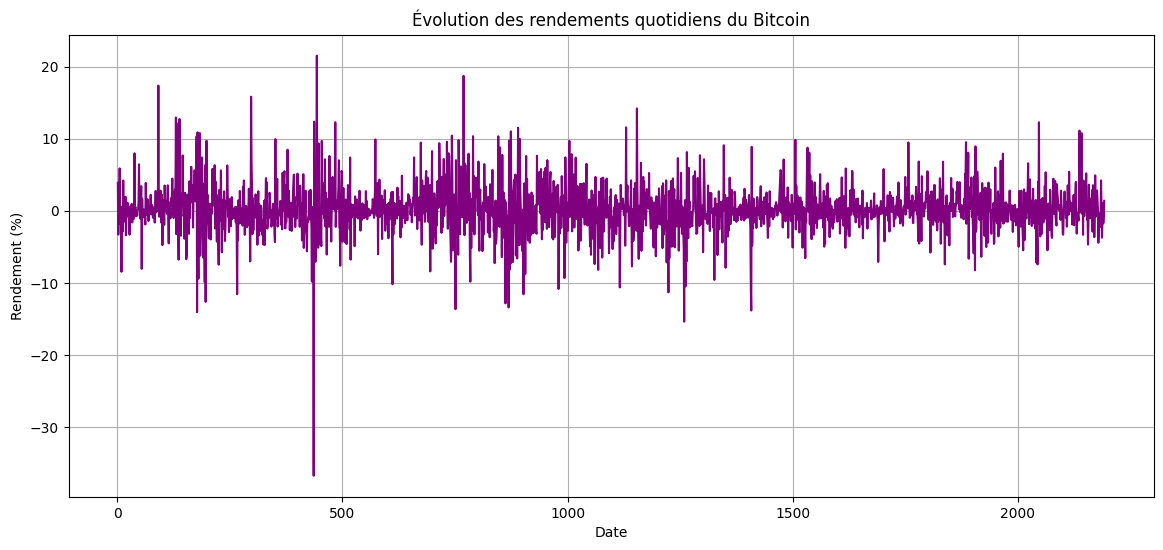

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Rendement'], color='purple')
plt.title("Évolution des rendements quotidiens du Bitcoin")
plt.xlabel("Date")
plt.ylabel("Rendement (%)")
plt.grid(True)
plt.show()

In [ ]:
stats = df['Rendement'].describe()
print(stats)

# Ajouter des mesures complémentaires :
print(f"Skewness (asymétrie) : {df['Rendement'].skew()}")
print(f"Kurtosis (crête) : {df['Rendement'].kurtosis()}")

count    2192.000000
mean        0.207463
std         3.360468
min       -36.735283
25%        -1.254461
50%         0.081117
75%         1.589854
max        21.500399
Name: Rendement, dtype: float64
Skewness (asymétrie) : -0.2594738211961202
Kurtosis (crête) : 10.142053947921852


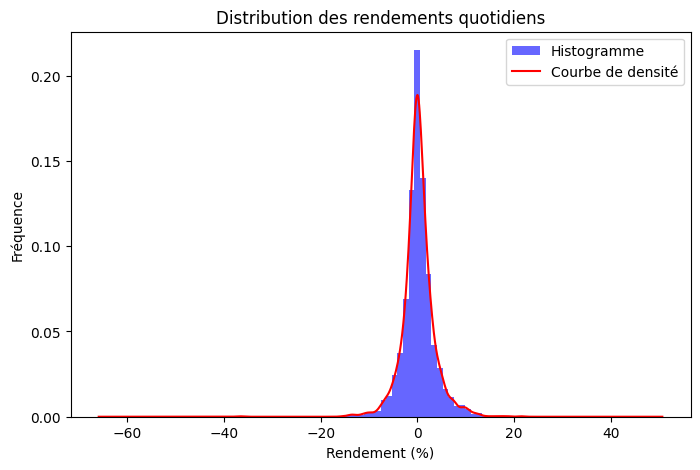

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Rendement'], bins=50, density=True, alpha=0.6, color='blue', label='Histogramme')
df['Rendement'].plot.kde(color='red', label='Courbe de densité')
plt.title("Distribution des rendements quotidiens")
plt.xlabel("Rendement (%)")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

In [ ]:
stat, p_value = shapiro(df['Rendement'])

alpha = 0.05
if p_value > alpha:
    print(f"p-value = {p_value:.4f} > α={alpha} → On ne peut pas rejeter l'hypothèse nulle (normalité acceptée)")
else:
    print(f"p-value = {p_value:.4f} ≤ α={alpha} → Rejet de l'hypothèse nulle (non-normalité)")

p-value = nan ≤ α=0.05 → Rejet de l'hypothèse nulle (non-normalité)


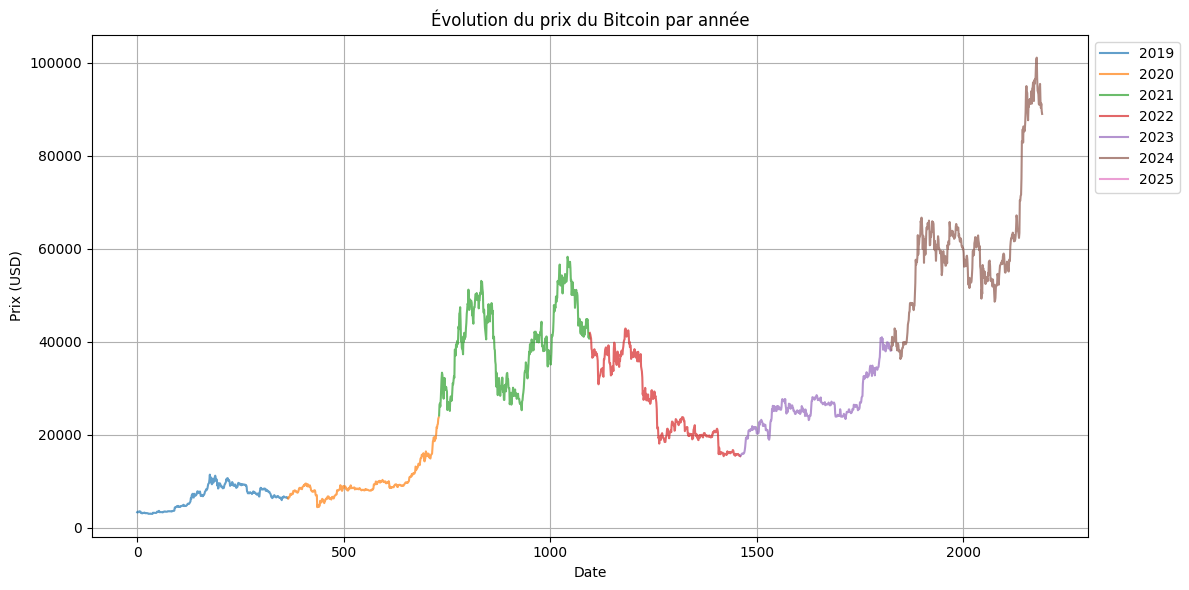

<ipython-input-26-a21654083ae3>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')['Fermeture'].mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que 'df' ait une colonne 'Fermeture' avec l'index 'date' au format datetime

# 1. Superposer l'évolution du prix par année
plt.figure(figsize=(12, 6))

# Grouper par année et tracer chaque année séparément
for year, group in df.groupby(df['date'].dt.year):
      plt.plot(group.index, group['Fermeture'], label=str(year), alpha=0.7)

plt.title("Évolution du prix du Bitcoin par année")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Légende à droite
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Analyser les cycles
# Par exemple : Moyennes mensuelles ou trimestrielles
monthly_avg = df.resample('M')['Fermeture'].mean()
quarterly_avg = df.resample('Q')['Fermeture'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index.month, monthly_avg.values, marker='o', label='Moyenne mensuelle')
plt.plot(quarterly_avg.index.quarter, quarterly_avg.values, marker='s', label='Moyenne trimestrielle')
plt.title("Cycles saisonniers du prix du Bitcoin")
plt.xlabel("Mois/Trimestre")
plt.ylabel("Prix moyen (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.dropna(inplace= True)

In [ ]:

import pandas as pd
from statsmodels.tsa.stattools import acf

# Supposons que vous avez un DataFrame 'df' avec une colonne 'Rendement'
returns = df['Rendement']

# Calcul des auto-corrélations pour k=1, 2, 3
acf_values = acf(returns, nlags=3)

print("Auto-corrélation pour k=1 :", acf_values[1])
print("Auto-corrélation pour k=2 :", acf_values[2])
print("Auto-corrélation pour k=3 :", acf_values[3])

Auto-corrélation pour k=1 : -0.053721033036765904
Auto-corrélation pour k=2 : 0.04491223916492958
Auto-corrélation pour k=3 : -0.016164277141022386


<Figure size 1000x600 with 0 Axes>

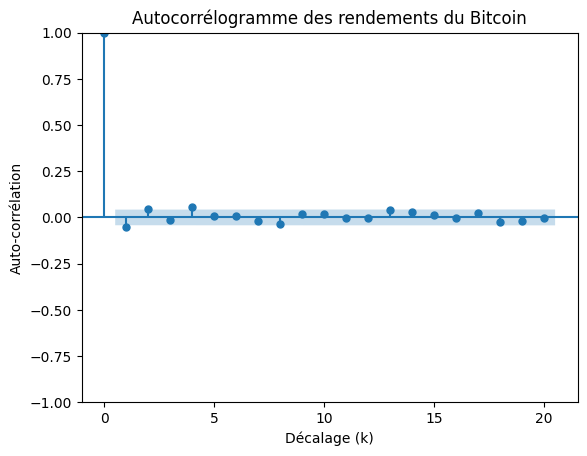

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(returns, lags=20, alpha=0.05)
plt.title("Autocorrélogramme des rendements du Bitcoin")
plt.xlabel("Décalage (k)")
plt.ylabel("Auto-corrélation")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Assurez-vous que l'index est la date au format datetime

# Calcul des moyennes mobiles
df['MMC'] = df['Fermeture'].rolling(window=20).mean()
df['MML'] = df['Fermeture'].rolling(window=50).mean()

# Générer les signaux
df['Signal'] = 0  # 0 = Ne rien faire, 1 = Achat, -1 = Vente

# Détecter les croisements
# Use .iloc to access rows by numerical index
for i in range(1, len(df)):
    if df['MMC'].iloc[i] > df['MML'].iloc[i] and df['MMC'].iloc[i-1] <= df['MML'].iloc[i-1]:
        df['Signal'].iloc[i] = 1  # Croisement haussier
    elif df['MMC'].iloc[i] < df['MML'].iloc[i] and df['MMC'].iloc[i-1] >= df['MML'].iloc[i-1]:
        df['Signal'].iloc[i] = -1  # Croisement baissier

# Simulation du portefeuille
initial_capital = 100_000
portfolio = pd.DataFrame(index=df.index)
portfolio['Position'] = df['Signal'].shift(1).fillna(0)  # Exécution le jour suivant
portfolio['Holdings'] = portfolio['Position'] * df['Fermeture']
portfolio['Cash'] = initial_capital - (portfolio['Holdings'].diff().cumsum()).fillna(0)
portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']

# Rendement de la stratégie
portfolio['Return'] = portfolio['Total'].pct_change().dropna()

<ipython-input-30-1b0f40d84270>:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'].iloc[i] = -1  # Croisement baissier
<ipython-input-30-1b0f40d84270>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Visualisation des résultats
*texte en italique*

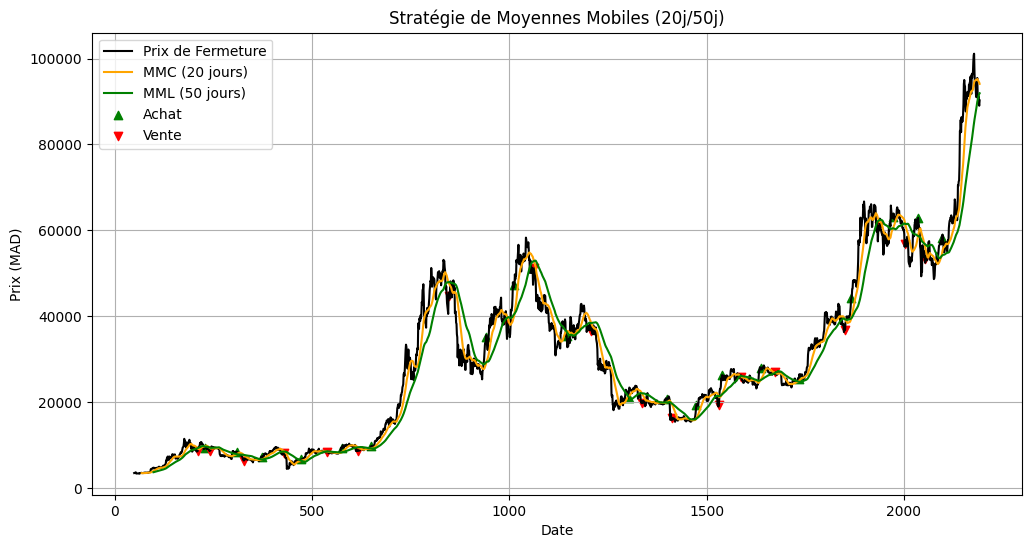

In [ ]:
plt.figure(figsize=(12, 6))

# Prix et moyennes mobiles
plt.plot(df.index, df['Fermeture'], label='Prix de Fermeture', color='black')
plt.plot(df.index, df['MMC'], label='MMC (20 jours)', color='orange')
plt.plot(df.index, df['MML'], label='MML (50 jours)', color='green')

# Signaux d'achat/vente
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Fermeture'], marker='^', color='green', label='Achat')
plt.scatter(sell_signals.index, sell_signals['Fermeture'], marker='v', color='red', label='Vente')

plt.title("Stratégie de Moyennes Mobiles (20j/50j)")
plt.xlabel("Date")
plt.ylabel("Prix (MAD)")
plt.legend()
plt.grid(True)
plt.show()

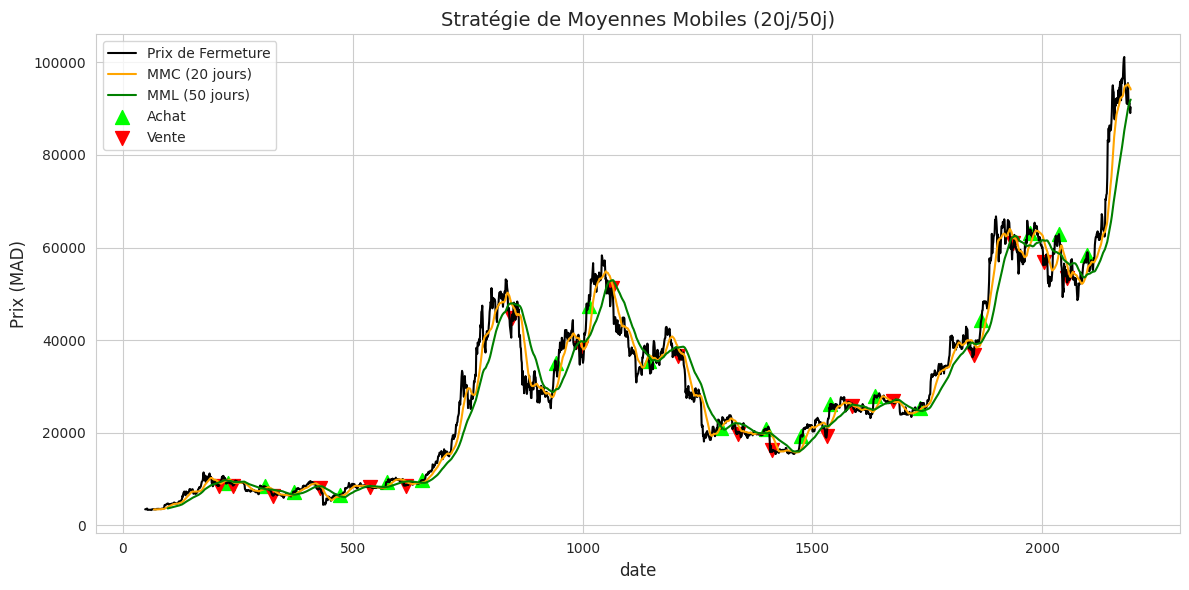

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style using seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Plot price and moving averages
sns.lineplot(data=df, x=df.index, y='Fermeture', label='Prix de Fermeture', color='black')
sns.lineplot(data=df, x=df.index, y='MMC', label='MMC (20 jours)', color='orange')
sns.lineplot(data=df, x=df.index, y='MML', label='MML (50 jours)', color='green')

# Buy/Sell signals
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Fermeture'], marker='^', s=100, color='lime', label='Achat')
plt.scatter(sell_signals.index, sell_signals['Fermeture'], marker='v', s=100, color='red', label='Vente')

# Labels and title
plt.title("Stratégie de Moyennes Mobiles (20j/50j)", fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel("Prix (MAD)", fontsize=12)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

calcull PNL


In [ ]:
initial_cash = 1_000_000  # MAD
btc_quantity = 0.1  # Quantité achetée/vendue par transaction
# Créer un DataFrame pour suivre le portefeuille
portfolio = pd.DataFrame(index=df.index)
portfolio['Signal'] = df['Signal'].shift(1)  # Exécution le jour suivant le signal
portfolio['Cash'] = initial_cash  # Initialisation
portfolio['BTC'] = 0.0

# Parcourir chaque jour
for i in range(1, len(portfolio)):
    # Vérifier s'il y a un signal d'achat/vente
    if portfolio['Signal'].iloc[i] == 1:  # Achat
        # Calculer le coût de l'achat
        cost = df['Fermeture'][i] * btc_quantity
        # Mettre à jour le cash et les BTC
        portfolio.loc[i, 'Cash'] = portfolio['Cash'][i-1] - cost
        portfolio.loc[i, 'BTC'] = portfolio['BTC'][i-1] + btc_quantity
    elif portfolio['Signal'].iloc[i] == -1:  # Vente
        # Calculer le gain de la vente
        revenue = df['Fermeture'][i] * btc_quantity
        # Mettre à jour le cash et les BTC
        portfolio.loc[i, 'Cash'] = portfolio['Cash'][i-1] + revenue
        portfolio.loc[i, 'BTC'] = portfolio['BTC'][i-1] - btc_quantity
    else:
        # Pas de transaction, maintenir les valeurs précédentes
        portfolio.loc[i, 'Cash'] = portfolio['Cash'].iloc[i-1]
        portfolio.loc[i, 'BTC'] = portfolio['BTC'].iloc[i-1]



3. Valeur finale du portefeuille


In [ ]:
final_cash = portfolio['Cash'].iloc[-1]
final_btc = portfolio['BTC'].iloc[-1]
last_price = df['Fermeture'].iloc[-1]

# Valeur totale = Cash + (BTC × Prix final)
final_value = final_cash + (final_btc * last_price)
print(f"Valeur finale du portefeuille : {final_value:.2f} MAD")

Valeur finale du portefeuille : 1000000.00 MAD




>4. Rendement total



In [ ]:
return_pct = ((final_value / initial_cash) - 1) * 100
print(f"Rendement total : {return_pct:.2f}%")

Rendement total : 0.00%


In [ ]:
# Compter les jours où un signal d'achat ou de vente a été exécuté
transactions = len(portfolio[portfolio['Signal'] != 0])
print(f"Nombre total de transactions : {transactions}")

Nombre total de transactions : 87


In [ ]:
# Valeur finale du portefeuille
final_value = portfolio['Cash'].iloc[-1] + (portfolio['BTC'].iloc[-1] * df['Fermeture'].iloc[-1])

# Rendement absolu (en MAD)
absolute_return = final_value - initial_cash
print(f"Rendement absolu : {absolute_return:.2f} MAD")

# Rendement relatif (%)
relative_return = ((final_value / initial_cash) - 1) * 100
print(f"Rendement relatif : {relative_return:.2f}%")

Rendement absolu : 0.00 MAD
Rendement relatif : 0.00%


In [ ]:
# Calculer le nombre de jours entre la première et dernière date
# Access the index using .iloc[-1] and .iloc[0]
n_days = (df.index.to_series().iloc[-1] - df.index.to_series().iloc[0])

# Appliquer la formule
annualized_return = ((1 + (relative_return / 100)) ** (365 / n_days)) - 1
annualized_return_pct = annualized_return * 100
print(f"Rendement annualisé : {annualized_return_pct:.2f}%")

Rendement annualisé : 0.00%


In [ ]:
# Calcul du rendement Buy & Hold
initial_btc = initial_cash / df['Fermeture'].iloc[0]
final_btc_value = initial_btc * df['Fermeture'].iloc[-1]
buy_hold_return = ((final_btc_value / initial_cash) - 1) * 100

print(f"Rendement Buy & Hold : {buy_hold_return:.2f}%")

Rendement Buy & Hold : 2493.32%


In [ ]:
# Calcul du rendement à 3% annuel
risk_free_rate = 0.03
n_years = n_days / 365
risk_free_final = initial_cash * (1 + risk_free_rate) ** n_years
risk_free_return = ((risk_free_final / initial_cash) - 1) * 100

print(f"Rendement sans risque (3%) : {risk_free_return:.2f}%")

Rendement sans risque (3%) : 18.95%


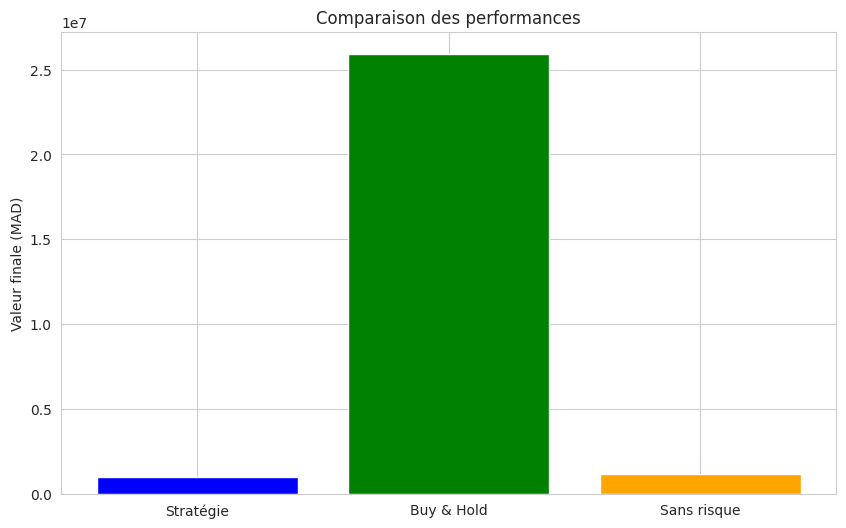

In [ ]:
plt.figure(figsize=(10, 6))

# Valeurs finales
strat_value = final_value
buy_hold_value = final_btc_value
risk_free_value = risk_free_final

labels = ['Stratégie', 'Buy & Hold', 'Sans risque']
values = [strat_value, buy_hold_value, risk_free_value]

plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title("Comparaison des performances")
plt.ylabel("Valeur finale (MAD)")
plt.show()

Améliorations possibles

In [ ]:
from ta.volatility import AverageTrueRange

# Calculer l'ATR sur 14 jours
# Use the renamed column 'Plus haut' instead of 'High'
# Use the renamed column 'Plus bas' instead of 'Low'
# Use the renamed column 'Fermeture' instead of 'Close'
df['ATR'] = AverageTrueRange(high=df['Plus haut'], low=df['Plus bas'], close=df['Fermeture'], window=14).average_true_range()

# Filtre : Ne trader que si ATR > seuil (ex. 10%)
df['Signal'] = np.where((df['Signal'] != 0) & (df['ATR'] > 0.1), df['Signal'], 0)

ModuleNotFoundError: No module named 'ta'

In [ ]:
from itertools import product

# Définir les plages de paramètres à tester
mmc_periods = [10, 20, 30]
mml_periods = [50, 100, 200]

best_return = -np.inf
best_params = (0, 0)

def calculate_return(df):
    """
    Calculates the return of a trading strategy.
    """
    # Initialize variables (you need to define initial_cash and btc_quantity here)
    initial_cash = 1_000_000  # MAD
    btc_quantity = 0.1  # Quantité achetée/vendue par transaction

    portfolio = pd.DataFrame(index=df.index)
    portfolio['Signal'] = df['Signal'].shift(1)  # Exécution le jour suivant le signal
    portfolio['Cash'] = initial_cash  # Initialisation
    portfolio['BTC'] = 0.0

    for i in range(1, len(portfolio)):
        if portfolio['Signal'].iloc[i] == 1:  # Achat
            cost = df['Fermeture'][i] * btc_quantity
            portfolio.loc[i, 'Cash'] = portfolio['Cash'][i-1] - cost
            portfolio.loc[i, 'BTC'] = portfolio['BTC'][i-1] + btc_quantity
        elif portfolio['Signal'].iloc[i] == -1:  # Vente
            revenue = df['Fermeture'][i] * btc_quantity
            portfolio.loc[i, 'Cash'] = portfolio['Cash'][i-1] + revenue
            portfolio.loc[i, 'BTC'] = portfolio['BTC'][i-1] - btc_quantity
        else:
            portfolio.loc[i, 'Cash'] = portfolio['Cash'].iloc[i-1]
            portfolio.loc[i, 'BTC'] = portfolio['BTC'].iloc[i-1]

    final_value = portfolio['Cash'].iloc[-1] + (portfolio['BTC'].iloc[-1] * df['Fermeture'].iloc[-1])
    relative_return = ((final_value / initial_cash) - 1) * 100

    return relative_return


for mmc, mml in product(mmc_periods, mml_periods):
    df['MMC'] = df['Fermeture'].rolling(mmc).mean()
    df['MML'] = df['Fermeture'].rolling(mml).mean()

    # Recalculate the signal (adjust the condition based on your strategy)
    for i in range(1, len(df)):
        if df['MMC'].iloc[i] > df['MML'].iloc[i] and df['MMC'].iloc[i-1] <= df['MML'].iloc[i-1]:
            df['Signal'].iloc[i] = 1  # Croisement haussier
        elif df['MMC'].iloc[i] < df['MML'].iloc[i] and df['MMC'].iloc[i-1] >= df['MML'].iloc[i-1]:
            df['Signal'].iloc[i] = -1  # Croisement baissier
        else:
            df['Signal'].iloc[i] = 0  # No signal

    # Call calculate_return with the updated DataFrame
    current_return = calculate_return(df)

    if current_return > best_return:
        best_return = current_return
        best_params = (mmc, mml)

print(f"Meilleurs paramètres : MMC={best_params[0]}j, MML={best_params[1]}j")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'].iloc[i] = 0  # No signal
<ipython-input-44-b820743ef4c0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'].iloc[i] = 0  # No signal
<ipython-input-44-b820743ef4c0>:53: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a cop

Meilleurs paramètres : MMC=10j, MML=50j


In [ ]:
# Exemple : Stop-loss à 2x ATR en dessous du prix d'achat
portfolio['Stop_Loss'] = 0.0

#portfolio['Position'] = df['Signal'].shift(1).fillna(0)  # Exécution le jour suivant
portfolio['Position'] = 0.0 # Initialize as 0
for i in range(1, len(df)):
    if df['Signal'].iloc[i-1] == 1:
        portfolio.loc[df.index[i], 'Position'] = 1
    elif df['Signal'].iloc[i-1] == -1:
        portfolio.loc[df.index[i], 'Position'] = -1
    else:
        portfolio.loc[df.index[i], 'Position'] = portfolio['Position'].iloc[i-1]

for i in range(1, len(portfolio)):
    if portfolio['Position'].iloc[i] == 1:  # En position longue
        stop_price = portfolio['Cash'][i-1] / portfolio['BTC'][i-1] - 2 * df['ATR'][i]
        portfolio.loc[i, 'Stop_Loss'] = stop_price
    elif portfolio['Position'][i] == -1:  # En position courte
        # À compléter selon la stratégie
        pass

<ipython-input-45-5e99008b620a>:16: RuntimeWarning: divide by zero encountered in scalar divide
  stop_price = portfolio['Cash'][i-1] / portfolio['BTC'][i-1] - 2 * df['ATR'][i]


KeyError: 'ATR'

In [ ]:
from itertools import product

# Définir les plages de paramètres à tester
mmc_periods = [10, 20, 30]
mml_periods = [50, 100, 200]

best_return = -np.inf
best_params = (0, 0)

for mmc, mml in product(mmc_periods, mml_periods):
    df['MMC'] = df['Fermeture'].rolling(mmc).mean()
    df['MML'] = df['Fermeture'].rolling(mml).mean()
    # Générer signaux et calculer rendement
    # ...
    current_return = calculate_return()  # Fonction hypothétique
    if current_return > best_return:
        best_return = current_return
        best_params = (mmc, mml)

print(f"Meilleurs paramètres : MMC={best_params[0]}j, MML={best_params[1]}j")

In [ ]:
df

,date,Clôture Ajustée,Fermeture,Plus haut,Plus bas,Ouverture,Volume,daily range,Clôture Ajustée (MAD),Fermeture (MAD),Plus haut (MAD),Plus bas (MAD),Ouverture (MAD),Volume (MAD),MA50,Rendement,MMC,MML,Signal
49,2019-02-19,3480.855713,3480.855713,3550.250000,3457.109131,3458.170898,8760246807,93.140869,37593.241699,37593.241699,3.834270e+04,37336.778613,37348.245703,9.461067e+10,3218.524912,0.554412,NaN,NaN,0
50,2019-02-20,3525.297852,3525.297852,3527.264648,3459.408203,3480.332764,7662026836,67.856445,38073.216797,38073.216797,3.809446e+04,37361.608594,37587.593848,8.274989e+10,3221.960752,1.276759,NaN,NaN,0
51,2019-02-21,3486.701904,3486.701904,3538.560791,3477.775879,3525.846436,6856030209,60.784912,37656.380566,37656.380566,3.821646e+04,37559.979492,38079.141504,7.404513e+10,3222.025869,-1.094828,NaN,NaN,0
52,2019-02-22,3532.994629,3532.994629,3533.866943,3483.810059,3485.425537,6903230070,50.056885,38156.341992,38156.341992,3.816576e+04,37625.148633,37642.595801,7.455488e+10,3225.318647,1.327694,NaN,NaN,0
53,2019-02-23,3653.833008,3653.833008,3674.789307,3500.535889,3527.164062,7869699502,174.253418,39461.396484,39461.396484,3.968772e+04,37805.787598,38093.371875,8.499275e+10,3230.689355,3.420282,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2024-12-28,90321.710938,90321.710938,93460.554688,89574.578125,91831.031250,50280519776,3885.976562,975474.478125,975474.478125,1.009374e+06,967405.443750,991775.137500,5.430296e+11,90756.671563,-1.736544,94046.971615,65827.850684,0
2189,2024-12-29,91258.117188,91258.117188,91605.226562,90177.281250,90317.226562,23117994682,1427.945312,985587.665625,985587.665625,9.893364e+05,973914.637500,975426.046875,2.496743e+11,91154.213281,1.036745,94069.648438,65970.679355,0
2190,2024-12-30,89674.539062,89674.539062,91268.617188,89027.757812,91267.828125,28414175532,2240.859375,968485.021875,968485.021875,9.857011e+05,961499.784375,985692.543750,3.068731e+11,91515.062656,-1.735274,93988.138021,66103.504141,0
2191,2024-12-31,89031.242188,89031.242188,91217.281250,87812.015625,89671.632812,53997345803,3405.265625,961537.415625,961537.415625,9.851466e+05,948369.768750,968453.634375,5.831713e+11,91793.367969,-0.717368,93916.550000,66237.803516,0


In [ ]:
# prompt: build a leaniare regretion model input date and output Fermeture

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['date'].values
y = df['Fermeture'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# ... (rest of the code)inearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


ValueError: Expected 2D array, got 1D array instead:
array=['2024-07-12T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-10T00:00:00.000000000' ... '2022-03-25T00:00:00.000000000'
 '2022-09-05T00:00:00.000000000' '2021-06-28T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

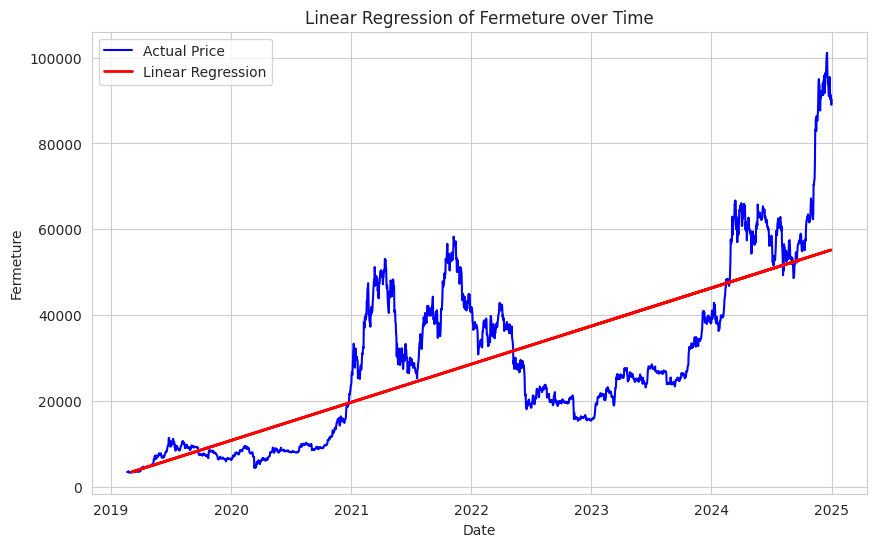

In [ ]:
# prompt: plot LinearRegression line with date and Fermeture

# Assuming X is your date data and y is your 'Fermeture' data
# Make sure X is a 2D array as required by scikit-learn

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.plot(X, y, color='blue', label='Actual Price')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel("Date")  # Corrected label
plt.ylabel("Fermeture") # Corrected label
plt.title("Linear Regression of Fermeture over Time")
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 170856770.04270896
R-squared: 0.5665986241153286


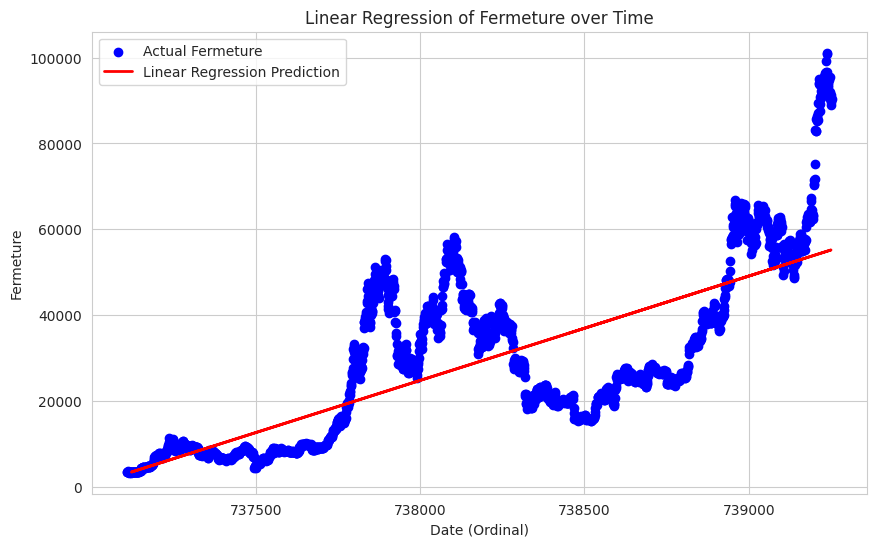

Predicted Fermeture price for 2025-12-30: 64071.96353762224


In [ ]:
# prompt: i want to do vertical projection in 2025/12/30 # Assuming X is your date data and y is your 'Fermeture' data
# # Make sure X is a 2D array as required by scikit-learn
# # Plot the actual data points
# plt.figure(figsize=(10, 6))
# plt.plot(X, y, color='blue', label='Actual Price')
# # Plot the regression line
# plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
# plt.xlabel("Date")  # Corrected label
# plt.ylabel("Fermeture") # Corrected label
# plt.title("Linear Regression of Fermeture over Time")
# plt.legend()
# plt.grid(True)
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ... (Your existing code) ...

# Prepare the data for linear regression
# Convert 'date' column to numerical representation (e.g., ordinal values)
# First, handle NaT (Not a Time) values in the 'date' column
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime, invalid parsing will be set as NaT
df.dropna(subset=['date'], inplace=True)  # Remove rows with NaT values in the 'date' column

# Now you can safely apply toordinal()
df['date_ordinal'] = df['date'].apply(lambda date: date.toordinal())

X = df[['date_ordinal']].values  # Use date_ordinal as the feature
y = df['Fermeture'].values

# ... (rest of the code) ...

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Fermeture')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Prediction')
plt.xlabel("Date (Ordinal)")
plt.ylabel("Fermeture")
plt.title("Linear Regression of Fermeture over Time")
plt.legend()
plt.grid(True)
plt.show()


# Prediction for 2025-12-30
date_2025_12_30 = pd.to_datetime('2025-12-30')
date_2025_12_30_ordinal = date_2025_12_30.toordinal()
predicted_price = model.predict([[date_2025_12_30_ordinal]])

print(f"Predicted Fermeture price for 2025-12-30: {predicted_price[0]}")


Date is already the index.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Fermeture   No. Observations:                 2144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -17942.291
Date:                            Sat, 10 May 2025   AIC                          35894.583
Time:                                    15:25:24   BIC                          35922.905
Sample:                                02-19-2019   HQIC                         35904.949
                                     - 01-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      4.885     -0.205      0.838     -10.574       8.574
ma.L1          1.0000      4.828   

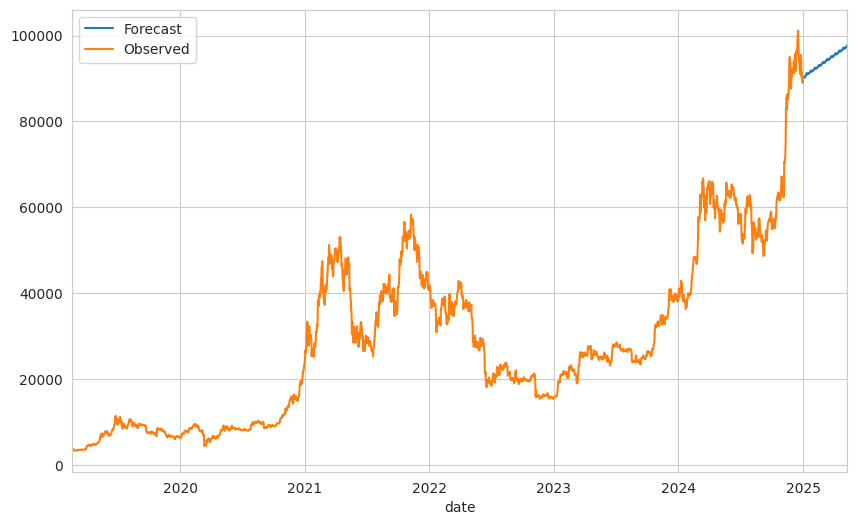

In [ ]:
# prompt: usE SARIMA ALGO


from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Assuming 'df' is your DataFrame with a 'Fermeture' column and a datetime index
# Example:
# df = pd.read_csv('your_file.csv', index_col='date', parse_dates=True)

# Convert the 'date' column to datetime and set it as the index if it's not already
# Convert the 'date' column to datetime if it's not already
# and reset it as index if it was removed before
if not isinstance(df.index, pd.DatetimeIndex):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
else:
    print("Date is already the index.")


# Fit the SARIMA model
# Specify the (p, d, q) and (P, D, Q, s) orders
model = SARIMAX(df['Fermeture'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) # Adjust orders as needed
results = model.fit()

# Print model summary
print(results.summary())

# Make predictions
predictions = results.get_forecast(steps=130)  # Forecast the next 30 days

# Get confidence intervals
confidence_intervals = predictions.conf_int()

# Print predictions
print(predictions.predicted_mean)

# Plot the forecast
plt.figure(figsize=(10, 6))
predictions.predicted_mean.plot(label='Forecast')
df['Fermeture'].plot(label='Observed')  # Now the index is a DatetimeIndex
plt.legend()
plt.show()